# MADE 2020 - DS - 21 - Фомин Фёдор

# Advanced ML. HW 1

# Часть I: О теореме Байеса

In [203]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


Обозначим вероятности:
    1. Вероятность быть виновным: P(guilty)
    2. Вероятность быть невиновным: P(innocent)
    3. Вероятность иметь группу крови, как у убийцы: P(blood)
    
Прокурор ошибочно оценил вероятности:
1. P(blood), но ошибочно утверждает, что это $P(blood | innocent)$
2. P(guilty), но ошибочно утверждает, что она равна $1 − P(blood)$

Прокурор должен был оценить вероятности:

$
1. P(guilty | blood)
$

$
2. P(blood | innocent)
$

#### 2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

Берём обозначения вероятностей из предыдущего пункта.

Адвокат оценил вероятности:
$1. P(guilty | blood) = \frac{1}{10000}$ 

Адвокат должен был оценить вероятности:
$1. P(guilty)$

И эта вероятность была бы ниже той, которую изначально оценил адвокат.
$P(guilty) = \frac{1}{1000000}$

#### 3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%. Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного). Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

$$
P(d=1 | t=1) = \frac{P(t=1 | d=1) * P(d=1)}{P(t=1 | d=1)*P(d=1) + P(t=1 | d=0)*P(d=0)}\
$$

In [204]:
# функция для расчета апостериорной вероятности P(d = 1| t = 1)
def compute_posterior_d_1_t_1(prior_d_1=0.01, true_positive=0.95, false_positive=0.05):
    return (true_positive * prior_d_1) / (true_positive * prior_d_1 + false_positive * (1 - prior_d_1))

$$
P(d=1 | t=0) = \frac{P(t=0 | d=1) * P(d=1)}{P(t=0 | d=1)*P(d=1) + P(t=0 | d=0)*P(d=0)}\
$$

In [205]:
# функция для расчета апостериорной вероятности P(d = 1| t = 0)
def compute_posterior_d_1_t_0(prior_d_1=0.01, true_negative=0.95, false_negative=0.05):
    return (false_negative * prior_d_1) / (false_negative * prior_d_1 + true_negative * (1 - prior_d_1))

In [206]:
# выбираем значения вероятности ошибки теста
x = np.linspace(0.05, 0.00, num=11)
print(x)

[0.05  0.045 0.04  0.035 0.03  0.025 0.02  0.015 0.01  0.005 0.   ]


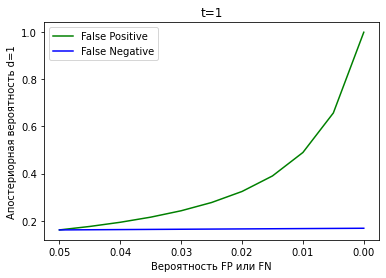

In [207]:
# строим графики для апостериорной вероятности P(d = 1| t = 1) 
fig, ax1 = plt.subplots()

ax1.plot(x, compute_posterior_d_1_t_1(false_positive=x), 'g-')
ax1.plot(x, compute_posterior_d_1_t_1(true_positive=(1 - x)), 'b-')

ax1.set_xlabel('Вероятность FP или FN')
ax1.set_ylabel('Апостериорная вероятность d=1')
ax1.invert_xaxis()
ax1.title.set_text('t=1')
ax1.legend(['False Positive', 'False Negative']);

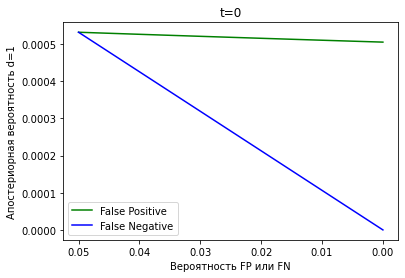

In [208]:
# строим графики для апостериорной вероятности P(d = 1| t = 0) 
fig, ax2 = plt.subplots()

ax2.plot(x, compute_posterior_d_1_t_0(true_negative=(1 - x)), 'g-')
ax2.plot(x, compute_posterior_d_1_t_0(false_negative=x), 'b-')

ax2.set_xlabel('Вероятность FP или FN')
ax2.set_ylabel('Апостериорная вероятность d=1')
ax2.invert_xaxis()
ax2.title.set_text('t=0')
ax2.legend(['False Positive', 'False Negative']);

Рассмотрим два случая:
1. Мы можем уменьшить вероятность ошибки FN до нуля.
2. Мы НЕ можем уменьшить вероятность ошибки FN до нуля.

В первом случае предлагаю врачам сделать упор на уменьшение ошибки FN до нуля, так как это поможет избежать упускания больных людей: то есть ситуация, когда человек болен, но тест показывает, что он здоров. Такой человек начинает заражать дальше. Уменьшение же ошибки FN до нуля позволит устранить такие ситуации 

Во втором случае предлагаю врачам уменьшать ошибку FP, так как это позволит меньше тратить медикаментов на лечение, когда на самом деле человек здоров.

# Часть II: О линейной регрессии

#### 1. Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [209]:
import pandas as pd

In [210]:
# загружаем данные
data_full = pd.read_csv('owid-covid-data.csv')

In [211]:
data_full

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70846,ZWE,Africa,Zimbabwe,2021-02-19,35710.0,167.0,95.000,1430.0,10.0,5.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70847,ZWE,Africa,Zimbabwe,2021-02-20,35768.0,58.0,94.857,1432.0,2.0,4.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70848,ZWE,Africa,Zimbabwe,2021-02-21,35796.0,28.0,89.143,1436.0,4.0,5.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70849,ZWE,Africa,Zimbabwe,2021-02-22,35862.0,66.0,91.429,1441.0,5.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [212]:
# фильтруем данные по дате и стране
data_task = data_full[(data_full['date'] >= '2020-03-03') & (data_full['location'] == 'Russia')]

# заменяем в new_cases все 0 на 1
data_task['new_cases'] = data_task['new_cases'].replace(0, 1)

# создаем признак "порядковый номер дня"
data_task['date_ID'] = data_task.reset_index().index

# находим натуральный логарифм от total_cases и new_cases
data_task['total_cases_exp'] = np.log(data_task['total_cases'])
data_task['new_cases_exp'] = np.log(data_task['new_cases'])

<ipython-input-212-92f1e364de96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_task['new_cases'] = data_task['new_cases'].replace(0, 1)
<ipython-input-212-92f1e364de96>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_task['date_ID'] = data_task.reset_index().index
<ipython-input-212-92f1e364de96>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [213]:
data_task

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_ID,total_cases_exp,new_cases_exp
52438,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0,1.098612,0.000000
52439,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,1,1.098612,0.000000
52440,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,2,1.386294,0.000000
52441,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,3,2.564949,2.197225
52442,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,4,2.564949,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52791,RUS,Europe,Russia,2021-02-19,4092649.0,13242.0,13535.857,81048.0,461.0,448.143,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,353,15.224703,9.491149
52792,RUS,Europe,Russia,2021-02-20,4105424.0,12775.0,13269.429,81517.0,469.0,444.857,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,354,15.227820,9.455245
52793,RUS,Europe,Russia,2021-02-21,4117992.0,12568.0,13069.429,81926.0,409.0,443.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,355,15.230876,9.438909
52794,RUS,Europe,Russia,2021-02-22,4130447.0,12455.0,12848.857,82255.0,329.0,435.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,356,15.233896,9.429877


In [214]:
# определяем тренировочный и тестовый датасеты
train_data_task = data_task[:50]
test_data_task = data_task[50:]

In [215]:
train_data_task

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_ID,total_cases_exp,new_cases_exp
52438,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0,1.098612,0.000000
52439,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,1,1.098612,0.000000
52440,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,2,1.386294,0.000000
52441,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,3,2.564949,2.197225
52442,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,4,2.564949,0.000000
52443,RUS,Europe,Russia,2020-03-08,17.0,4.0,2.143,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,5,2.833213,1.386294
52444,RUS,Europe,Russia,2020-03-09,17.0,1.0,2.000,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,6,2.833213,0.000000
52445,RUS,Europe,Russia,2020-03-10,20.0,3.0,2.429,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,7,2.995732,1.098612
52446,RUS,Europe,Russia,2020-03-11,20.0,1.0,2.429,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,8,2.995732,0.000000
52447,RUS,Europe,Russia,2020-03-12,28.0,8.0,3.429,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,9,3.332205,2.079442


In [216]:
test_data_task

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_ID,total_cases_exp,new_cases_exp
52488,RUS,Europe,Russia,2020-04-22,57999.0,5236.0,4787.000,513.0,57.0,45.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,50,10.968181,8.563313
52489,RUS,Europe,Russia,2020-04-23,62773.0,4774.0,4976.429,555.0,42.0,46.143,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,51,11.047280,8.470940
52490,RUS,Europe,Russia,2020-04-24,68622.0,5849.0,5230.571,615.0,60.0,48.857,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,52,11.136368,8.674026
52491,RUS,Europe,Russia,2020-04-25,74588.0,5966.0,5399.286,681.0,66.0,52.571,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,53,11.219735,8.693832
52492,RUS,Europe,Russia,2020-04-26,80949.0,6361.0,5442.286,747.0,66.0,55.143,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,54,11.301575,8.757941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52791,RUS,Europe,Russia,2021-02-19,4092649.0,13242.0,13535.857,81048.0,461.0,448.143,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,353,15.224703,9.491149
52792,RUS,Europe,Russia,2021-02-20,4105424.0,12775.0,13269.429,81517.0,469.0,444.857,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,354,15.227820,9.455245
52793,RUS,Europe,Russia,2021-02-21,4117992.0,12568.0,13069.429,81926.0,409.0,443.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,355,15.230876,9.438909
52794,RUS,Europe,Russia,2021-02-22,4130447.0,12455.0,12848.857,82255.0,329.0,435.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,356,15.233896,9.429877


#### 2. Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

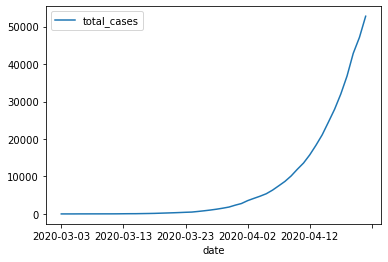

In [217]:
train_data_task.plot(x="date", y="total_cases");

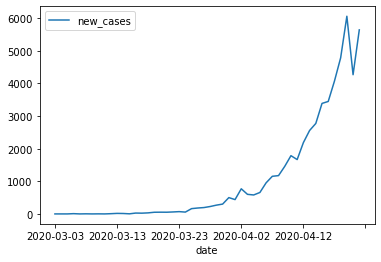

In [218]:
train_data_task.plot(x="date", y="new_cases");

#### a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня. 

In [219]:
# смотрим тренировочный датасет
train_data_task[['date', 'total_cases', 'total_cases_exp', 'new_cases', 'date_ID']]

,date,total_cases,total_cases_exp,new_cases,date_ID
52438,2020-03-03,3.0,1.098612,1.0,0
52439,2020-03-04,3.0,1.098612,1.0,1
52440,2020-03-05,4.0,1.386294,1.0,2
52441,2020-03-06,13.0,2.564949,9.0,3
52442,2020-03-07,13.0,2.564949,1.0,4
52443,2020-03-08,17.0,2.833213,4.0,5
52444,2020-03-09,17.0,2.833213,1.0,6
52445,2020-03-10,20.0,2.995732,3.0,7
52446,2020-03-11,20.0,2.995732,1.0,8
52447,2020-03-12,28.0,3.332205,8.0,9


In [220]:
from sklearn import linear_model

# создаём объект линейной регрессии
regr = linear_model.LinearRegression()

# обучаем модель
regr.fit(train_data_task[['date_ID']], train_data_task[['total_cases_exp']])
regr_y = regr.predict(train_data_task[['date_ID']])

print(regr.coef_, regr.intercept_)

[[0.19829091]] [1.82073715]


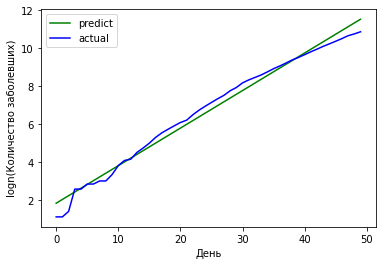

In [221]:
# график логарифма числа заболевших
fig, ax2 = plt.subplots()

ax2.plot(train_data_task[['date_ID']], regr_y, 'g-')
ax2.plot(train_data_task[['date_ID']], train_data_task[['total_cases_exp']], 'b-')

ax2.set_xlabel('День')
ax2.set_ylabel('logn(Количество заболевших)')
ax2.legend(['predict', 'actual']);

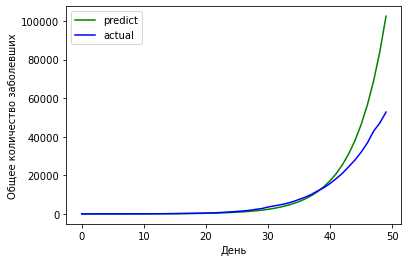

In [222]:
# график числа заболевших
fig, ax2 = plt.subplots()

ax2.plot(train_data_task[['date_ID']], np.exp(regr_y), 'g-')
ax2.plot(train_data_task[['date_ID']], train_data_task[['total_cases']], 'b-')

ax2.set_xlabel('День')
ax2.set_ylabel('Общее количество заболевших')
ax2.legend(['predict', 'actual']);

In [223]:
# считаем остатки линейной регрессии
resid = train_data_task[['total_cases_exp']] - regr_y
resid

,total_cases_exp
52438,-0.722125
52439,-0.920416
52440,-0.831025
52441,0.149339
52442,-0.048951
52443,0.021022
52444,-0.177269
52445,-0.213041
52446,-0.411332
52447,-0.273151


#### b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [224]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [225]:
# находим апостериорное распределение параметров этой модели
cur_mu, cur_sigma = np.array([0, 0]), 10000000 * np.eye(2)

resid_std = resid.std()
for x, y in zip(train_data_task['date_ID'], train_data_task['total_cases_exp']):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, x, y, resid_std[0])

In [226]:
print("параметры модели из задания a:", regr.intercept_, *regr.coef_)
print("параметры модели из задания b:", cur_mu)
print(cur_sigma)

параметры модели из задания a: [1.82073715] [0.19829091]
параметры модели из задания b: [1.82073715 0.19829091]
[[ 9.65283368e-03 -2.92510111e-04]
 [-2.92510111e-04  1.19391882e-05]]


#### c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [227]:
def myplot_sample_lines(mu, sigma, n):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        plt.plot(train_data_task['date_ID'], np.exp(w[0] + w[1] * train_data_task['date_ID']), 'k-', lw=.4)

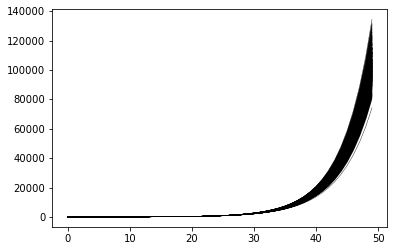

In [228]:
myplot_sample_lines(cur_mu, cur_sigma, n=500)

In [229]:
# функция для построения распределения в определенную дату
def myplot_sample_hist(mu, sigma, n, date_point):
    y = []
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        y.append(np.exp(w[0] + w[1] * date_point))
    plt.hist(y, bins=100)

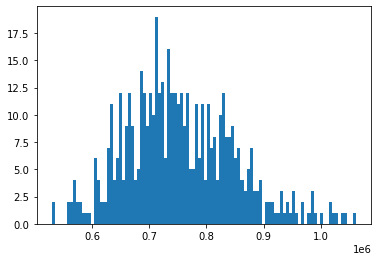

In [230]:
# строим распределение для 2020-05-01
myplot_sample_hist(cur_mu, cur_sigma, n=500, date_point=data_task['date_ID'].loc[data_task['date'] == '2020-05-01'].values[0])

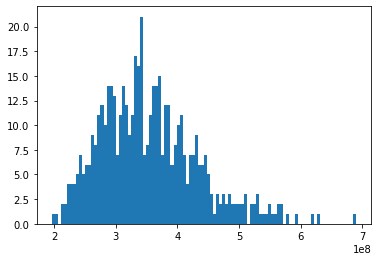

In [231]:
# строим распределение для 2020-06-01
myplot_sample_hist(cur_mu, cur_sigma, n=500, date_point=data_task['date_ID'].loc[data_task['date'] == '2020-06-01'].values[0])

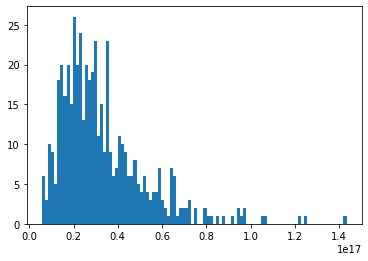

In [232]:
# строим распределение для 2020-09-01
myplot_sample_hist(cur_mu, cur_sigma, n=500, date_point=data_task['date_ID'].loc[data_task['date'] == '2020-09-01'].values[0])

#### 3. Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана. Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

#### a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

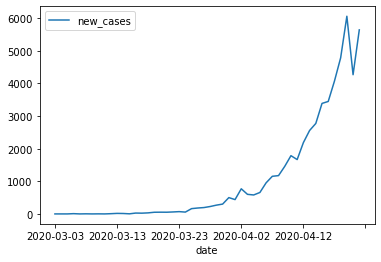

In [233]:
train_data_task.plot(x="date", y="new_cases");

In [234]:
# находим натуральный логарифм от new_cases
train_data_task['new_cases_exp'] = np.log(train_data_task['new_cases'])

<ipython-input-234-61855973fd60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_task['new_cases_exp'] = np.log(train_data_task['new_cases'])


In [235]:
train_data_task

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_ID,total_cases_exp,new_cases_exp
52438,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0,1.098612,0.000000
52439,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,1,1.098612,0.000000
52440,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,2,1.386294,0.000000
52441,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,3,2.564949,2.197225
52442,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,4,2.564949,0.000000
52443,RUS,Europe,Russia,2020-03-08,17.0,4.0,2.143,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,5,2.833213,1.386294
52444,RUS,Europe,Russia,2020-03-09,17.0,1.0,2.000,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,6,2.833213,0.000000
52445,RUS,Europe,Russia,2020-03-10,20.0,3.0,2.429,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,7,2.995732,1.098612
52446,RUS,Europe,Russia,2020-03-11,20.0,1.0,2.429,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,8,2.995732,0.000000
52447,RUS,Europe,Russia,2020-03-12,28.0,8.0,3.429,NaN,NaN,0.000,...,6.18,23.4,58.3,NaN,8.05,72.58,0.824,9,3.332205,2.079442


In [236]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, include_bias=False)
X_ = poly.fit_transform(train_data_task[['date_ID']])
clf = linear_model.LinearRegression()
clf.fit(X_, train_data_task[['new_cases_exp']])
clf_pred = clf.predict(X_)

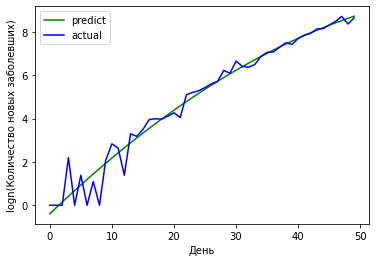

In [237]:
# график логарифма числа новых заболевших
fig, ax2 = plt.subplots()

ax2.plot(train_data_task[['date_ID']], clf_pred, 'g-')
ax2.plot(train_data_task[['date_ID']], train_data_task[['new_cases_exp']], 'b-')

ax2.set_xlabel('День')
ax2.set_ylabel('logn(Количество новых заболевших)')
ax2.legend(['predict', 'actual']);

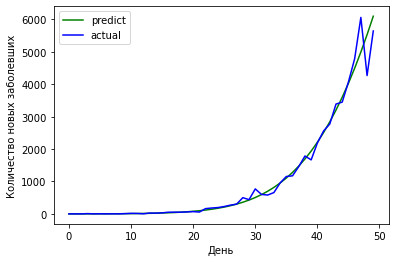

In [238]:
# график числа новых заболевших
fig, ax2 = plt.subplots()

ax2.plot(train_data_task[['date_ID']], np.exp(clf_pred), 'g-')
ax2.plot(train_data_task[['date_ID']], train_data_task[['new_cases']], 'b-')

ax2.set_xlabel('День')
ax2.set_ylabel('Количество новых заболевших')
ax2.legend(['predict', 'actual']);

In [239]:
print("параметры модели из задания a:", clf.intercept_, *clf.coef_)

параметры модели из задания a: [-0.3965904] [ 0.27562283 -0.00182979]


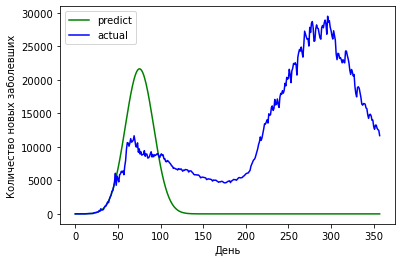

In [240]:
# сделаем предсказания для всех дней датасета
X_full = poly.transform(data_task[['date_ID']])
clf_pred_full = clf.predict(X_full)

# график числа новых заболевших
fig, ax2 = plt.subplots()

ax2.plot(data_task[['date_ID']], np.exp(clf_pred_full), 'g-')
ax2.plot(data_task[['date_ID']], data_task[['new_cases']], 'b-')

ax2.set_xlabel('День')
ax2.set_ylabel('Количество новых заболевших')
ax2.legend(['predict', 'actual']);

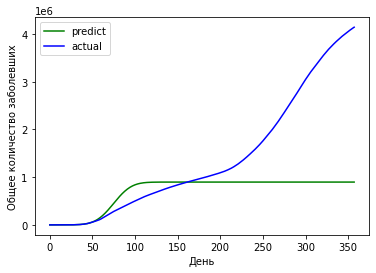

In [241]:
# график общего числа заболевших
fig, ax2 = plt.subplots()

ax2.plot(data_task[['date_ID']], np.cumsum(np.exp(clf_pred_full)), 'g-')
ax2.plot(data_task[['date_ID']], data_task[['total_cases']], 'b-')


ax2.set_xlabel('День')
ax2.set_ylabel('Общее количество заболевших')
ax2.legend(['predict', 'actual']);

#### b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [242]:
# считаем остатки полином регрессии
resid = train_data_task[['new_cases_exp']] - clf_pred
resid

,new_cases_exp
52438,0.396590
52439,0.122797
52440,-0.147336
52441,1.783415
52442,-0.676624
52443,0.450515
52444,-1.191274
52445,-0.344497
52446,-1.691286
52447,0.143639


In [243]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, *x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [244]:
# находим апостериорное распределение параметров этой модели
cur_mu, cur_sigma = np.array([0, 0, 0]), 10000000 * np.eye(3)

resid_std = resid.std()
for x, y in zip(X_, train_data_task['new_cases_exp']):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, x, y, resid_std[0])

In [245]:
print("параметры модели из задания a:", clf.intercept_, *clf.coef_)
print("параметры модели из задания b:", cur_mu)
print(cur_sigma)

параметры модели из задания a: [-0.3965904] [ 0.27562283 -0.00182979]
параметры модели из задания b: [-0.3965904   0.27562283 -0.00182979]
[[ 4.06140191e-02 -3.28138294e-03  5.52421370e-05]
 [-3.28138294e-03  3.61807813e-04 -6.90526713e-06]
 [ 5.52421370e-05 -6.90526713e-06  1.40923819e-07]]


#### c. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

In [265]:
def myplot_sample_lines(mu, sigma, n):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        plt.plot(data_task['date_ID'], np.exp(w[0] + w[1] * data_task['date_ID'] + w[2] * data_task['date_ID'] * data_task['date_ID']), 'k-', lw=.5)
    return my_w

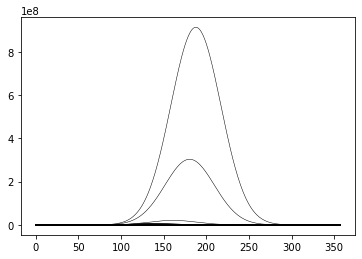

In [266]:
# построим графики количества новых случаев
a = myplot_sample_lines(cur_mu, cur_sigma, n=1000)

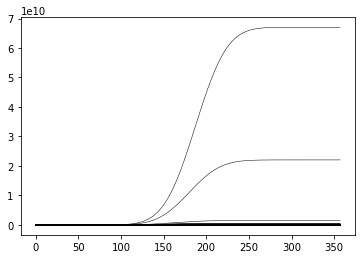

In [267]:
# построим графики общего количества случаев
for w in a:
    plt.plot(data_task['date_ID'], np.cumsum(np.exp(w[0] + w[1] * data_task['date_ID'] + w[2] * data_task['date_ID'] * data_task['date_ID'])), 'k-', lw=.5)

In [268]:
# определяем распределение общего количества зараженных за 358 дней
list_358 = []
count_358 = []
for w in a:
    y = []
    for i in data_task['date_ID']:
        y.append(np.exp(w[0] + w[1] * i + w[2] * i * i))
    list_358.append(np.cumsum(y))

for i in list_358:
    count_358.append(i[-1])

In [269]:
# количество зараженных в 10-м перцентиле
np.percentile(count_358, 10)

311612.00615106546

In [270]:
# количество зараженных в 90-м перцентиле
np.percentile(count_358, 90)

5164134.329470525